### Run all cells using toolbar's "Run" -> "Run All Cells"

In [1]:
# Imports and setup
import sqlite3
import pandas as pd

db_file = "/home/jovyan/work/data/Data.db"

# Open database in autocommit mode by setting isolation_level to None.
#conn = sqlite3.connect(f"file:{db_file}?mode=ro", uri=True, isolation_level=None)
# Set journal mode to WAL.
#conn.execute('pragma journal_mode=wal')

# Function to execute a query and return the results as a pandas DataFrame
def run_query(statement, display_df=False):
    conn = sqlite3.connect(f"file:{db_file}?mode=ro&immutable=1", uri=True)
    df = pd.read_sql_query(statement, conn)
    if display_df:
        display(df)
    conn.close()
    return df


In [7]:
run_query("""
SELECT 
    *
FROM 
    Runs
""")

Id                    StartTime                      EndTime  \
0    1  2024-03-27 09:33:13.8830337  2024-03-27 09:33:33.3678924   
1    2  2024-03-27 17:56:39.0373796  2024-03-27 17:56:48.7022472   
2    3  2024-03-27 17:56:49.4642027  2024-03-27 17:56:50.9460645   
3    4   2024-03-28 09:49:45.504503  2024-03-28 09:49:56.1401719   
4    5  2024-03-28 09:50:45.0777218   2024-03-28 09:51:14.151119   
5    6  2024-03-28 09:56:10.0652586   2024-03-28 09:56:11.369312   
6    7  2024-03-28 10:00:59.0162825  2024-03-28 10:01:52.3703251   
7    8  2024-03-28 10:02:13.6854051  2024-03-28 10:02:46.0530682   
8    9  2024-03-28 10:18:31.5487745  2024-03-28 10:19:10.5311973   
9   10  2024-03-28 10:23:44.8930718  2024-03-28 10:25:33.4007268   
10  11  2024-03-28 10:30:20.5796702  2024-03-28 10:30:35.0138345   
11  12  2024-03-28 10:43:21.9665905  2024-03-28 10:43:35.4964626   
12  13  2024-03-28 10:50:14.5510468  2024-03-28 10:50:54.7591947   
13  14  2024-03-28 10:52:49.5637061  2024-03-28 10:53:06.5437407   
14  15  2024-03-28 10:54:11.9652729  2024-03-28 10:54:20.0714724   

    ConfigurationId  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
5                 1  
6                 1  
7                 1  
8                 1  
9                 1  
10                1  
11                1  
12                1  
13                1  
14                1

Id                    Timestamp      Value  RunId  DeviceId
0     13521  2024-03-28 10:50:14.9892395  12.560000     13         1
1     13522  2024-03-28 10:50:14.9892395   9.420000     13         2
2     13523  2024-03-28 10:50:14.9892395  25.120001     13         3
3     13524  2024-03-28 10:50:14.9892395  37.680000     13         4
4     13525  2024-03-28 10:50:14.9892395  15.700001     13         5
...     ...                          ...        ...    ...       ...
1643  15164  2024-03-28 10:50:54.5017632  12.560000     13        12
1644  15165  2024-03-28 10:50:54.5017632  21.980001     13        13
1645  15166  2024-03-28 10:50:54.5017632  40.820000     13        14
1646  15167  2024-03-28 10:50:54.5017632   0.000000     13        15
1647  15168  2024-03-28 10:50:54.5017632   4.000000     13        16

[1648 rows x 5 columns]

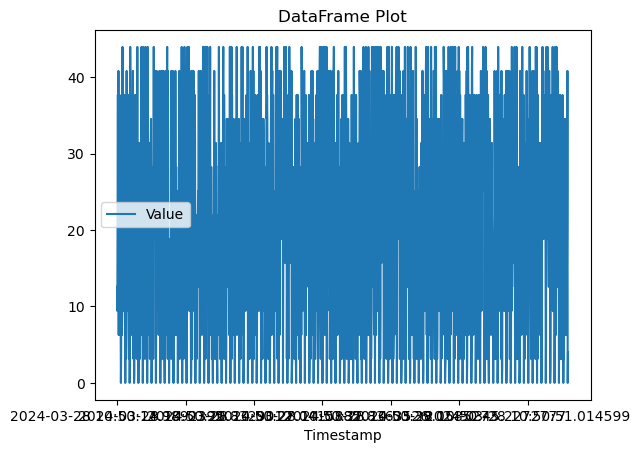

In [11]:
df = run_query("""
SELECT 
    *
FROM 
    Measurements
WHERE
    RunId = 13
""", display_df=True)
plot = df.plot(title="DataFrame Plot", x="Timestamp", y="Value")